In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_avg_reward(df, num_avg = 50):
    avg_rewards = [df['reward'].values[0]]
    episodes = [df['episode'].values[0]]

    for i in range(int(len(df)/num_avg)):
        episodes.append(df[(i+1)*num_avg-1:(i+1)*num_avg]['episode'].values[0]+1)
        avg_rewards.append(df[i*num_avg:(i+1)*num_avg].mean()[1])

    return pd.DataFrame({'reward':avg_rewards, 'episode': episodes})

In [3]:
def get_axes(num_graph, n_rows):
    assert num_graph % n_rows == 0, "Invalid n_rows"
    _, axes = plt.subplots(nrows=n_rows, ncols=int(num_graph/n_rows), figsize = (5*(num_graph/n_rows),5*n_rows))

    if axes.shape[0] == num_graph:
        return axes
    else:
        axes_list = []
        for x in range(len(axes)):
            for y in range(len(axes[0])):
                axes_list.append(axes[x][y])
        return axes_list


In [4]:
def draw_plot(path_list, num=50, n_rows=1):
    axes = get_axes(num_graph=len(path_list), n_rows=n_rows)
    for idx in range(len(path_list)):
        df = pd.read_csv(path_list[idx])
        draw_df = get_avg_reward(df, num)
        axes[idx].set_xlabel('Training Episodes')
        axes[idx].set_ylabel('Average Reward per Episode')
        axes[idx].set_title(path_list[idx].split('/')[-1].split('.')[0])
        axes[idx].plot(draw_df['episode'],draw_df['reward'],color="green")
    plt.show()

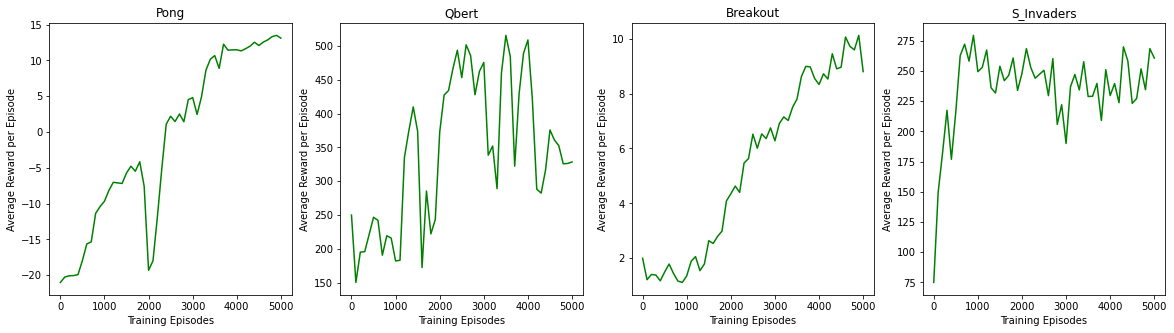

In [5]:
first_exp_list = ['./results/Pong.csv', 'results/Qbert.csv', 'results/Breakout.csv', 'results/S_Invaders.csv']
draw_plot(first_exp_list,100,1)